**Veri Setini Yükleme**

In [1]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Veri setini Kaggle'dan oku
df = pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')


In [3]:
# Veri setinin ilk birkaç satırını görüntüle
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Veri Keşfi (EDA)**

In [4]:
# Veri setinin genel bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Eksik verileri kontrol et
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Sayısal veriler için istatistiksel özet
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


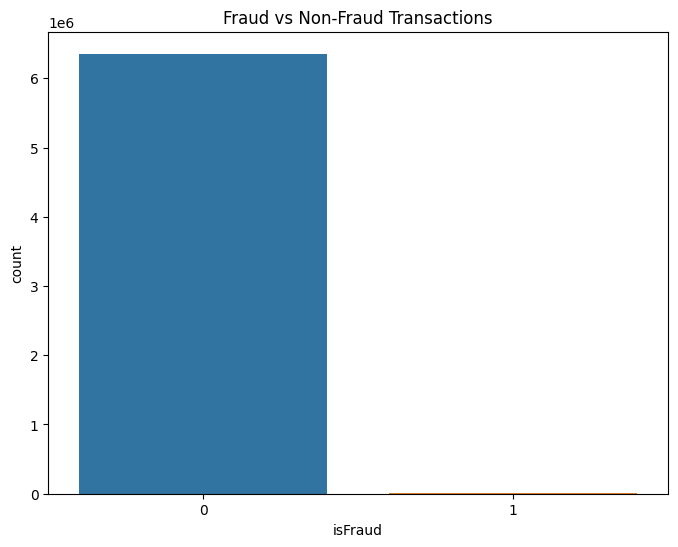

In [7]:
# Sahtekarlık oranını görselleştir
plt.figure(figsize=(8,6))
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

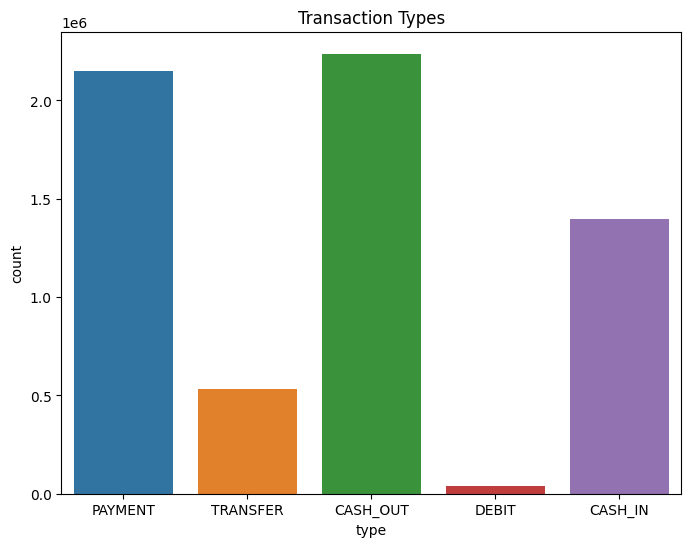

In [8]:
# İşlem türlerini görselleştir
plt.figure(figsize=(8,6))
sns.countplot(x='type', data=df)
plt.title('Transaction Types')
plt.show()


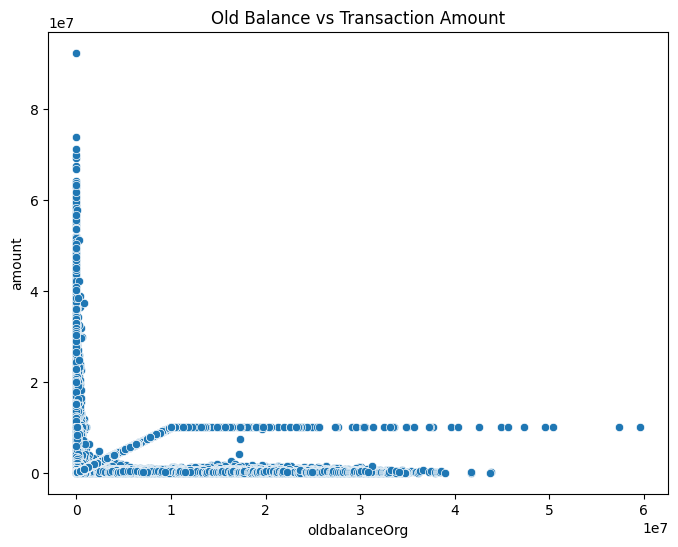

In [9]:
# Eski bakiye ve işlem miktarı arasındaki ilişkiyi görselleştir
plt.figure(figsize=(8,6))
sns.scatterplot(x='oldbalanceOrg', y='amount', data=df)
plt.title('Old Balance vs Transaction Amount')
plt.show()

**Veri Ön İşleme**

In [10]:
# Eksik verileri kaldır
df = df.dropna()

In [11]:
# Kategorik veriler için one-hot encoding
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [12]:
# Özellikler ve hedef
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]  # Özellikler
y = df['isFraud']  # Hedef (sahtekarlık olup olmadığı)

**Gözetimli Öğrenme (Lojistik Regresyon Modeli)**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Lojistik regresyon modelini eğit
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Tahmin yap ve performansı değerlendir
y_pred = model.predict(X_test)


In [17]:
# Doğruluğu hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9976833442827011


In [18]:
# Sınıflandırma raporu
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.33      0.80      0.47      1620

    accuracy                           1.00   1272524
   macro avg       0.67      0.90      0.73   1272524
weighted avg       1.00      1.00      1.00   1272524



**Gözetimsiz Öğrenme (K-Means ile Kümeleme)**

Elbow Yöntemi ile En İyi K Değerinin Bulunması

In [19]:
from sklearn.cluster import KMeans


In [20]:
# Veri setinin küçük bir örneğini kullanarak hızlandırma
df_sample = df.sample(frac=0.1, random_state=42)


In [21]:
# Kümeleme için özellikleri yeniden belirle
X_sample = df_sample[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]


In [22]:
# Elbow Yöntemi için K değerleri arasındaki farkları incele
inertia = []
K_range = range(2, 11)  # 2'den 10'a kadar farklı K değerleri deneyelim

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(X_sample)
    inertia.append(kmeans.inertia_)


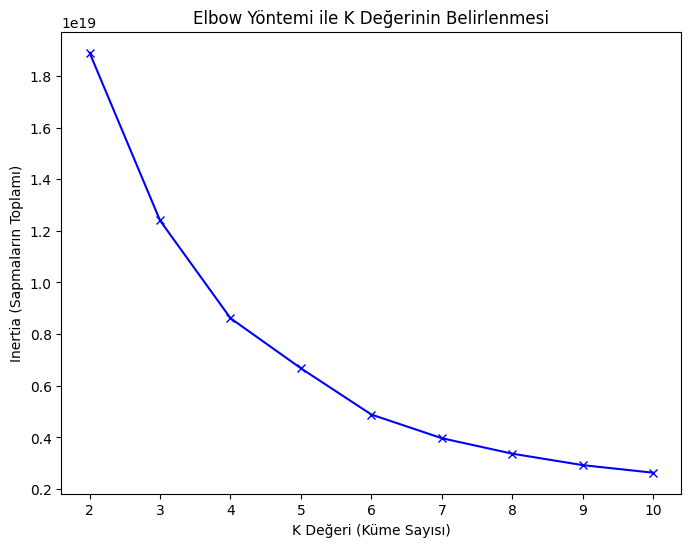

In [23]:
# Elbow Grafiği
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('K Değeri (Küme Sayısı)')
plt.ylabel('Inertia (Sapmaların Toplamı)')
plt.title('Elbow Yöntemi ile K Değerinin Belirlenmesi')
plt.show()

K-Means Kümeleme (En İyi K ile)

In [24]:
# En iyi K değerini Elbow yöntemine göre seç (örneğin K = 3)
optimal_k = 3


In [25]:
# K-Means modelini en iyi K değeri ile eğit
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=5)
kmeans.fit(X_sample)


KMeans(n_clusters=3, n_init=5, random_state=42)

In [26]:
# Küme etiketlerini veri setine ekle
df_sample['Cluster'] = kmeans.labels_


In [27]:
# Kümeleme sonuçlarını incele
print(df_sample[['Cluster', 'amount', 'oldbalanceOrg', 'newbalanceOrig']].head())

         Cluster      amount  oldbalanceOrg  newbalanceOrig
3737323        0   330218.42       20866.00       351084.42
264914         0    11647.08       30370.00        18722.92
85647          0   152264.21      106589.00       258853.21
5899326        0  1551760.63           0.00            0.00
2544263        0    78172.30     2921331.58      2999503.88
